<a href="https://colab.research.google.com/github/Aastik01us/Tata-Job-Simulation-Forage/blob/main/TataIQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

# Read the Excel file
df = pd.read_excel(io.BytesIO(list(uploaded.values())[0]))

# View basic info
print("Shape:", df.shape)
df.info()
df.describe(include='all')


Saving TataIQForage.xlsx to TataIQForage (1).xlsx
Shape: (500, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
count,500,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500,500.000000,500,500,500,500,500,500,500,500
unique,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,5,5,3,3,3,3,3,3
top,CUST0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unemployed,NaN,Gold,Los Angeles,On-time,Late,Late,Late,Missed,Late
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,118,107,177,173,169,181,187,172
mean,NaN,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,NaN,9.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,NaN,5.923054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
for col in ['Income', 'Credit_Score', 'Loan_Balance']:
    df[col] = num_imputer.fit_transform(df[[col]])

In [ ]:
# Encode categorical columns
label_cols = ['Employment_Status', 'Credit_Card_Type', 'Location',
              'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

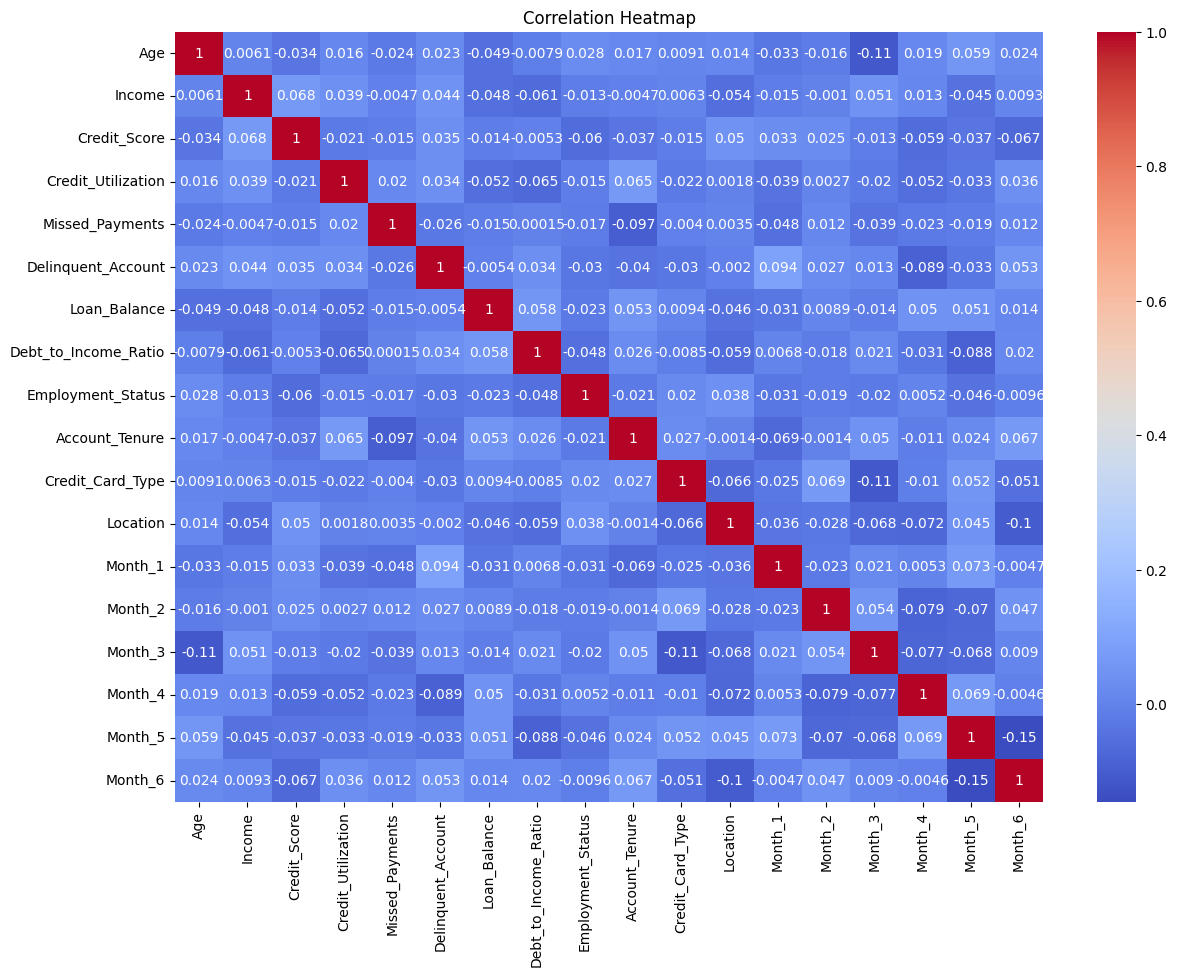

In [ ]:
plt.figure(figsize=(14,10))
# Drop the 'Customer_ID' column as it's not numerical and not relevant for correlation
sns.heatmap(df.drop('Customer_ID', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Credit_Card_Type', hue='Delinquent_Account', data=df)
plt.title("Delinquency by Credit Card Type")
plt.show()

In [ ]:
X = df.drop(columns=['Customer_ID', 'Delinquent_Account'])
y = df['Delinquent_Account']

# Normalize numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

AUC Score: 0.39285714285714285


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


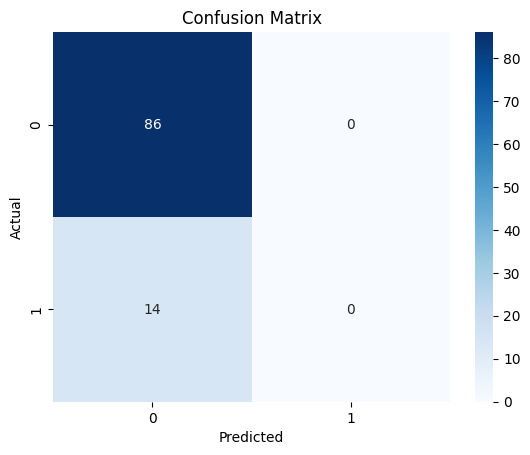

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

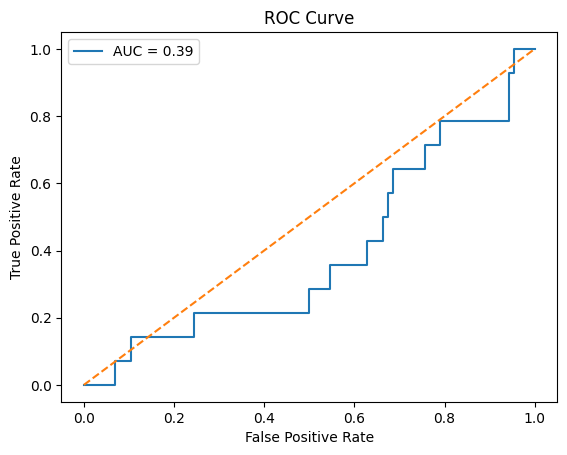

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

/tmp/ipython-input-17-1002824536.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
/tmp/ipython-input-17-1002824536.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100

AUC Score: 0.4750830564784053


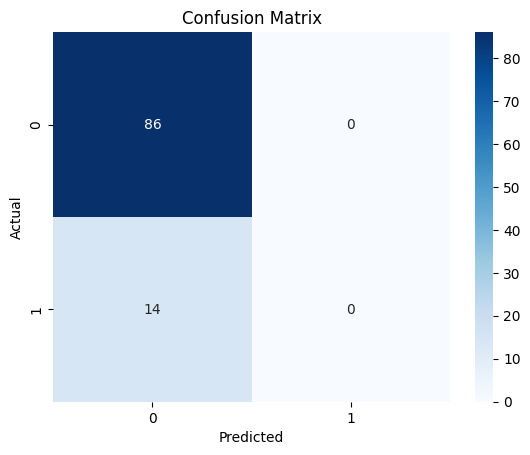

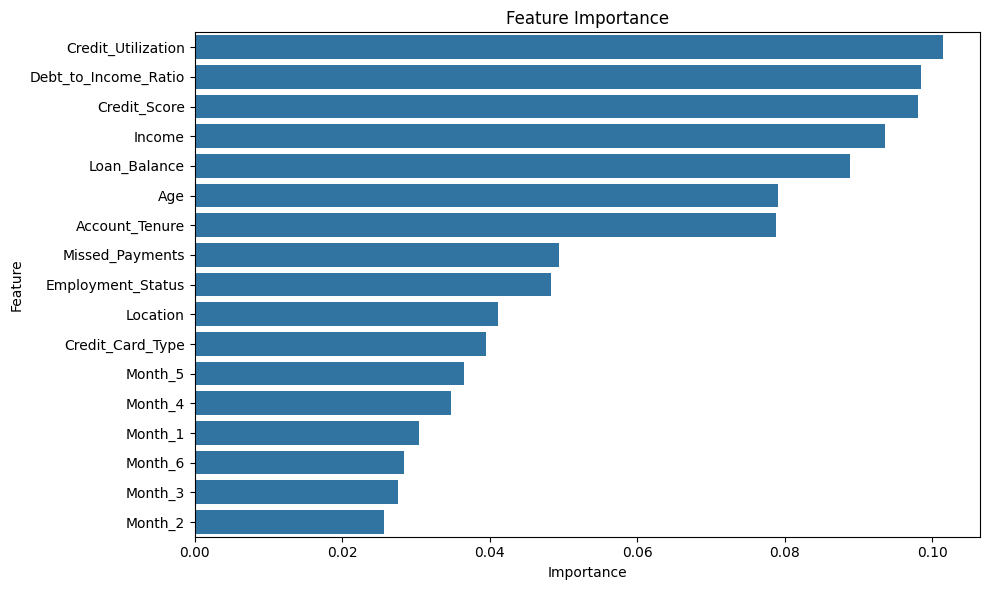

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/TataIQForage.xlsx')  # Make sure you upload this file to Colab

# Fill missing values
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit_Score'].fillna(df['Credit_Score'].mean(), inplace=True)
df['Loan_Balance'].fillna(df['Loan_Balance'].median(), inplace=True)

# Encode categorical variables
categorical_cols = ['Employment_Status', 'Credit_Card_Type', 'Location',
                    'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
df[categorical_cols] = df[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))

# Define features and target
X = df.drop(columns=['Customer_ID', 'Delinquent_Account'])
y = df['Delinquent_Account']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = model.feature_importances_
features = X.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=imp_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))
    print("-" * 40)

# Train/test split (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run models and evaluate
evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)
evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42), X_train, y_train, X_test, y_test)
evaluate_model("Random Forest", RandomForestClassifier(random_state=42), X_train, y_train, X_test, y_test)


===== Logistic Regression =====
Accuracy: 0.86
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.4485049833887043
----------------------------------------
===== Decision Tree =====
Accuracy: 0.67
Precision: 0.047619047619047616
Recall: 0.07142857142857142
F1 Score: 0.05714285714285714
AUC-ROC Score: 0.41943521594684385
----------------------------------------
===== Random Forest =====
Accuracy: 0.86
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC Score: 0.4750830564784053
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
